In [1]:
import numpy as np
from PIL import Image
import torch
from torchvision import models, transforms
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import os

%matplotlib inline

# Test

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from utils import *

In [2]:
img_id = 5

img_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.jpg'.format(img_id)
bb_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.txt'.format(img_id)

img, bbs = load_image_and_bbs(img_path, bb_path) 

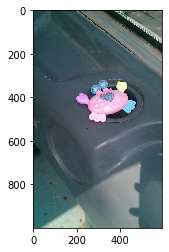

In [3]:
plt.figure()
plt.imshow(img)

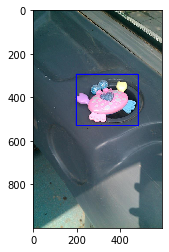

In [4]:
show_img_with_bbs(img, bbs)

In [5]:
from cnn_cbir import SearchEngine, FeatureExtractor

test_dir = '../SIFT-BOW-CBIR/Images'
feature_extrator = FeatureExtractor()
engine = SearchEngine(test_dir, feature_extrator)

In [6]:
engine.build()

2020-03-21 14:54:41,754 - INFO - Write database feature matrix into memory...
2020-03-21 14:54:41,755 - INFO - cached database feature matrix found in feature_cache/db_fea_mat.pth, loading it directly.


In [7]:
img = cv2.imread(engine.im_paths[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
similar_imgs = engine.retrieve_img(img, top_k=5)

2020-03-21 14:54:44,930 - DEBUG - fea_size(): torch.Size([1, 22, 512])
2020-03-21 14:54:44,930 - DEBUG - regions_ijww.shape: (22, 4)
2020-03-21 14:54:44,931 - DEBUG - reg_feat_mat.size(): torch.Size([22, 512])
2020-03-21 14:54:44,931 - DEBUG - ag_feat_vec.size(): torch.Size([512])


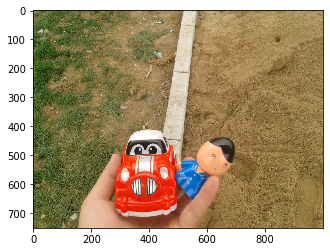

In [8]:
plt.figure()
plt.imshow(img)

0.9999999403953552
0.8507266044616699
0.8503950834274292
0.8361871242523193
0.8262256383895874


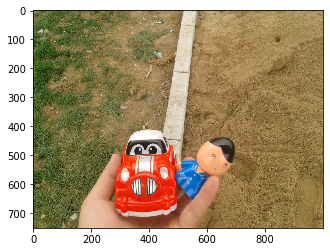

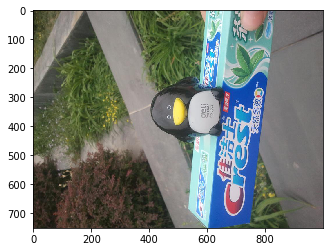

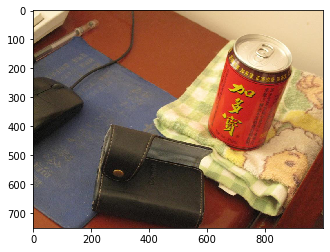

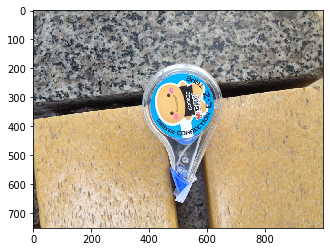

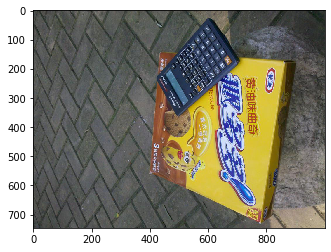

In [9]:
for im_path, score in similar_imgs:
    print(score)
    im = cv2.imread(im_path)[:, :, ::-1]
    plt.figure()
    plt.imshow(im)

In [10]:
img_id = 5
img_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.jpg'.format(img_id)
bb_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.txt'.format(img_id)
img, bbs = load_image_and_bbs(img_path, bb_path) 

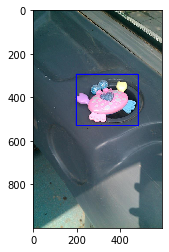

In [11]:
show_img_with_bbs(img, bbs)

In [12]:
similar_imgs = engine.retrieve_object(img, bbs, top_k=5)

2020-03-21 14:54:53,775 - DEBUG - fea_size(): torch.Size([1, 28, 512])
2020-03-21 14:54:53,776 - DEBUG - regions_ijww.shape: (28, 4)
2020-03-21 14:54:53,776 - DEBUG - reg_feat_mat.size(): torch.Size([28, 512])
2020-03-21 14:54:53,777 - DEBUG - ag_feat_vec.size(): torch.Size([512])
2020-03-21 14:54:53,830 - INFO - computing bounding box for retrieved 5 images...
  0%|          | 0/5 [00:00<?, ?it/s]2020-03-21 14:54:53,831 - INFO - computing bounding boxes in ../SIFT-BOW-CBIR/Images/01078.jpg
2020-03-21 14:54:53,831 - INFO - cached feature for ../SIFT-BOW-CBIR/Images/01078.jpg is found, directly loading it.
2020-03-21 14:54:53,834 - DEBUG - feat_im.size(): torch.Size([22, 512])
2020-03-21 14:54:53,834 - DEBUG - feat_patch.size(): torch.Size([512])
2020-03-21 14:54:53,834 - DEBUG - similarity.size(): torch.Size([22])
2020-03-21 14:54:53,842 - INFO - computing bounding boxes in ../SIFT-BOW-CBIR/Images/04023.jpg
2020-03-21 14:54:53,842 - INFO - cached feature for ../SIFT-BOW-CBIR/Images/040

0.7326624393463135
0.7121790051460266
0.6977733969688416
0.696121096611023
0.6863822340965271


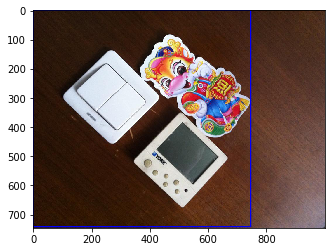

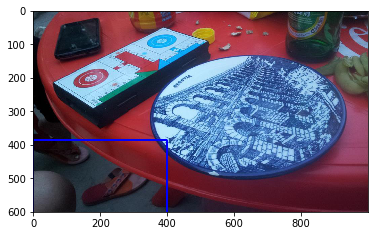

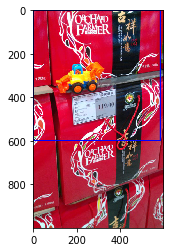

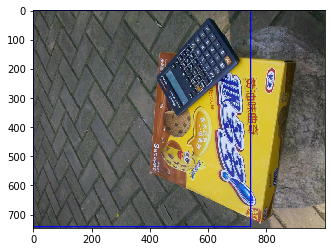

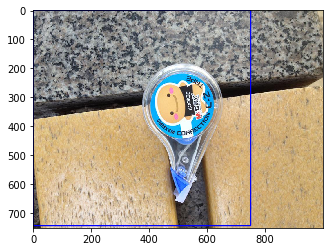

In [13]:
for im_path, score, bbs in similar_imgs:
    print(score)
    im = cv2.cvtColor(cv2.imread(im_path), cv2.COLOR_BGR2RGB)
    show_img_with_bbs(im, bbs)

# large scale test

In [1]:
from cnn_cbir import SearchEngine, FeatureExtractor

data_dir = '/home/zhulei/Data/pg_data/Images'
fea_extractor = FeatureExtractor(cache_dir='largedata_cache')
search_engine = SearchEngine(data_dir, fea_extractor)

In [2]:
search_engine.build()

2020-03-22 00:01:22,615 - INFO - building database feature matrix...
2020-03-22 00:01:22,629 - INFO - cached database feature matrix is found in largedata_cache/db_fea_mat.pth, loading it directly.


In [6]:
from utils import load_image_and_bbs, show_img_with_bbs
import cv2

img_id = 25
# img_id = 4
# img_id = 10
img_id = 10

im_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.jpg'.format(img_id)
bb_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.txt'.format(img_id)


img, bbs = load_image_and_bbs(im_path, bb_path)

In [7]:
similar_imgs = search_engine.retrieve_object(img, bbs, top_k=10)

2020-03-22 00:02:16,146 - INFO - computing bounding box for retrieved 10 images...
100%|██████████| 10/10 [00:00<00:00, 33.27it/s]


/home/zhulei/Data/pg_data/Images/22989.jpg
[[228.   0. 489. 483.]
 [228. 451. 489. 483.]]
/home/zhulei/Data/pg_data/Images/20993.jpg
[[228.   0. 489. 483.]
 [228. 225. 489. 483.]]
/home/zhulei/Data/pg_data/Images/18672.jpg
[[326.   0. 358. 354.]
 [228. 225. 489. 483.]]
/home/zhulei/Data/pg_data/Images/02593.jpg
[[  0.   0. 486. 483.]
 [227. 225. 486. 483.]]
/home/zhulei/Data/pg_data/Images/19106.jpg
[[228.   0. 489. 483.]
 [228. 225. 489. 483.]]
/home/zhulei/Data/pg_data/Images/04902.jpg
[[  0. 225. 486. 483.]
 [227. 451. 486. 483.]]
/home/zhulei/Data/pg_data/Images/13961.jpg
[[228. 451. 489. 483.]
 [228.   0. 489. 483.]]
/home/zhulei/Data/pg_data/Images/03134.jpg
[[  0. 225. 489. 483.]
 [  0.   0. 489. 483.]]
/home/zhulei/Data/pg_data/Images/02924.jpg
[[163.   0. 358. 354.]
 [228.   0. 489. 483.]]
/home/zhulei/Data/pg_data/Images/15586.jpg
[[326.   0. 358. 354.]
 [228. 451. 489. 483.]]


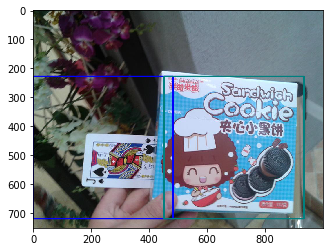

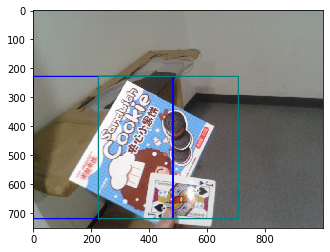

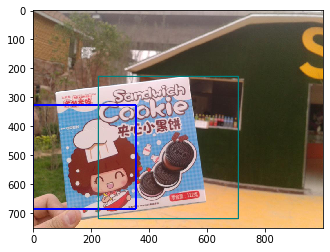

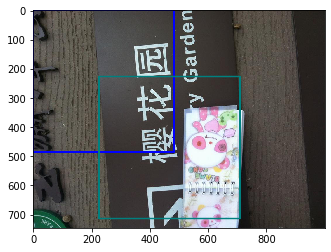

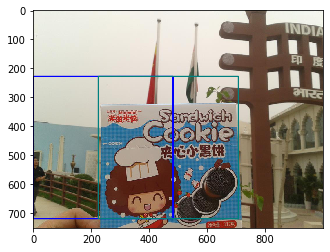

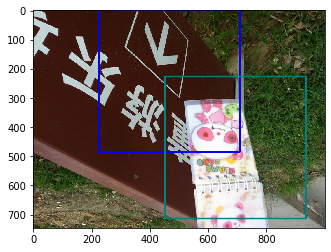

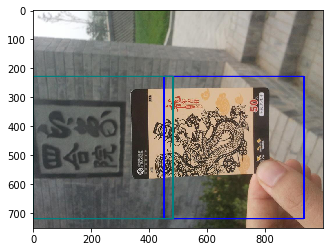

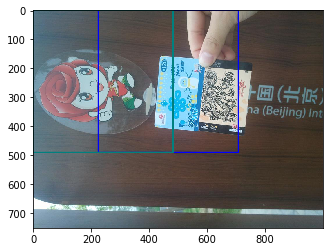

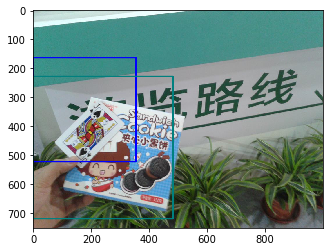

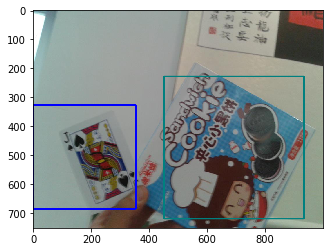

In [8]:
for img_path, score, bbs in similar_imgs:
    print(img_path)
    print(bbs)
#     print(score)
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    show_img_with_bbs(img, bbs, 'ijhw_mat')

## Test with  $l_0 = 2$

In [6]:
from cnn_cbir import SearchEngine, FeatureExtractor
%load_ext autoreload
%autoreload 2
%matplotlib inline

l0 = 2
L = 3

cache_dir='largedata_l0_{:d}_L_{:d}'.format(l0, L)
data_dir = '/home/zhulei/Data/pg_data/Images'

fea_extractor = FeatureExtractor(cache_dir=cache_dir,
                                 l0=l0,
                                 L=L)
search_engine = SearchEngine(data_dir, fea_extractor)

In [7]:
search_engine.build()

2020-03-21 18:53:01,210 - INFO - building database feature matrix...
2020-03-21 18:53:01,210 - INFO - cached database feature matrix is found in largedata_l0_2_L_3/db_fea_mat.pth, loading it directly.


In [8]:
from utils import load_image_and_bbs, show_img_with_bbs
import cv2

img_id = 25
# img_id = 4
# img_id = 10
img_id = 5

im_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.jpg'.format(img_id)
bb_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.txt'.format(img_id)


img, bbs = load_image_and_bbs(im_path, bb_path)

In [9]:
similar_imgs = search_engine.retrieve_object(img, bbs, top_k=10)

2020-03-21 18:53:03,239 - INFO - computing bounding box for retrieved 10 images...
100%|██████████| 10/10 [00:00<00:00, 101.52it/s]


/home/zhulei/Data/pg_data/Images/11212.jpg
[[193.   0. 387. 395.]]
/home/zhulei/Data/pg_data/Images/02918.jpg
[[193. 197. 387. 395.]]
/home/zhulei/Data/pg_data/Images/05877.jpg
[[193.   0. 387. 398.]]
/home/zhulei/Data/pg_data/Images/21912.jpg
[[387. 199. 387. 398.]]
/home/zhulei/Data/pg_data/Images/03019.jpg
[[  0. 225. 489. 483.]]
/home/zhulei/Data/pg_data/Images/16782.jpg
[[333. 322. 333. 322.]]
/home/zhulei/Data/pg_data/Images/27050.jpg
[[193. 199. 387. 398.]]
/home/zhulei/Data/pg_data/Images/01057.jpg
[[387.   0. 387. 398.]]
/home/zhulei/Data/pg_data/Images/15067.jpg
[[200. 387. 401. 387.]]
/home/zhulei/Data/pg_data/Images/13872.jpg
[[133. 266. 266. 266.]]


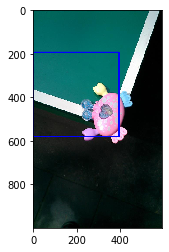

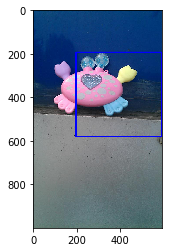

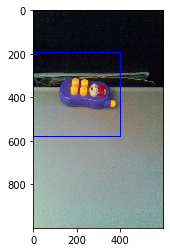

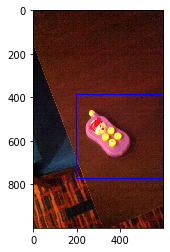

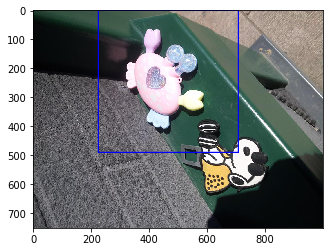

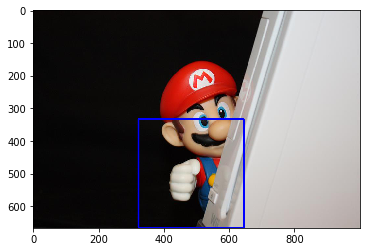

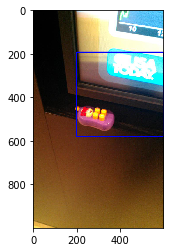

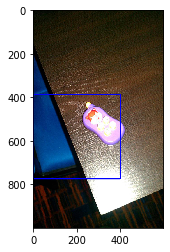

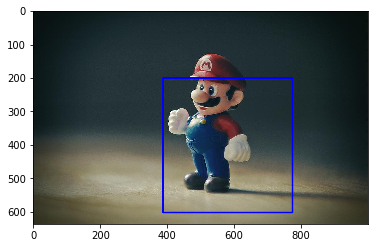

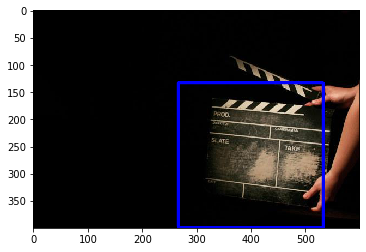

In [10]:
for img_path, score, bbs in similar_imgs:
    print(img_path)
    print(bbs)
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    show_img_with_bbs(img, bbs, 'ijhw_mat')

## Test with  $RAAC$ layer

In [1]:
from cnn_cbir import SearchEngine, FeatureExtractor
%load_ext autoreload
%autoreload 2
%matplotlib inline

pool='raac'

cache_dir='largedata_pool_{:s}'.format(pool)
data_dir = '/home/zhulei/Data/pg_data/Images'

fea_extractor = FeatureExtractor(cache_dir=cache_dir,
                                 pool=pool)
                                
search_engine = SearchEngine(data_dir, fea_extractor)

In [2]:
search_engine.build()

2020-03-21 18:58:28,006 - INFO - building database feature matrix...
2020-03-21 18:58:28,007 - INFO - computing feature for 28493 images...
100%|██████████| 28493/28493 [27:29<00:00, 17.27it/s]
2020-03-21 19:25:57,620 - INFO - database feature matrix is computed and saved!


In [3]:
from utils import load_image_and_bbs, show_img_with_bbs
import cv2

img_id = 25
# img_id = 4
# img_id = 10
img_id = 5

im_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.jpg'.format(img_id)
bb_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.txt'.format(img_id)


img, bbs = load_image_and_bbs(im_path, bb_path)

In [4]:
similar_imgs = search_engine.retrieve_object(img, bbs, top_k=10)

2020-03-21 19:25:57,796 - INFO - computing bounding box for retrieved 10 images...
100%|██████████| 10/10 [00:00<00:00, 120.08it/s]


/home/zhulei/Data/pg_data/Images/21912.jpg
[[387. 199. 387. 398.]]
/home/zhulei/Data/pg_data/Images/21194.jpg
[[  0. 225. 486. 483.]]
/home/zhulei/Data/pg_data/Images/11212.jpg
[[193.   0. 387. 395.]]
/home/zhulei/Data/pg_data/Images/28461.jpg
[[162. 322. 356. 354.]]
/home/zhulei/Data/pg_data/Images/19690.jpg
[[  0. 165. 354. 364.]]
/home/zhulei/Data/pg_data/Images/13872.jpg
[[  0. 200. 400. 400.]]
/home/zhulei/Data/pg_data/Images/16782.jpg
[[333. 322. 333. 322.]]
/home/zhulei/Data/pg_data/Images/07416.jpg
[[290.   0. 580. 598.]]
/home/zhulei/Data/pg_data/Images/27050.jpg
[[258. 132. 290. 299.]]
/home/zhulei/Data/pg_data/Images/12353.jpg
[[387.   0. 387. 398.]]


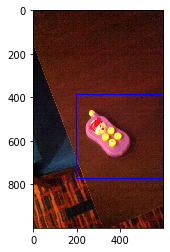

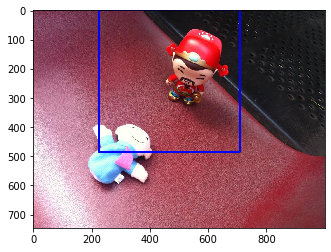

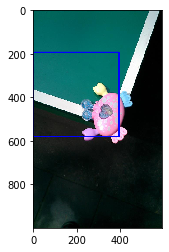

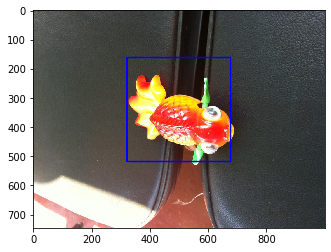

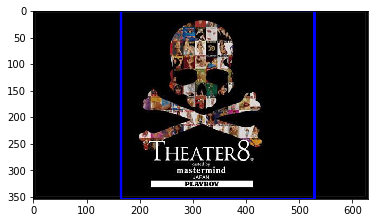

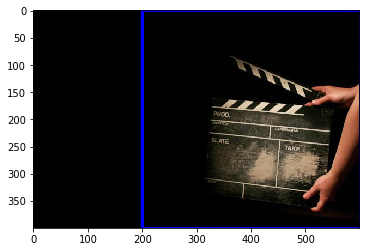

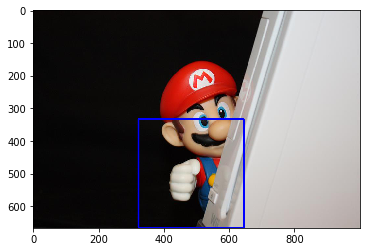

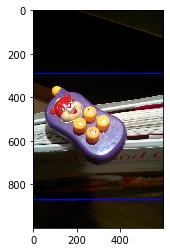

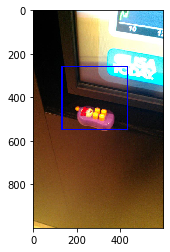

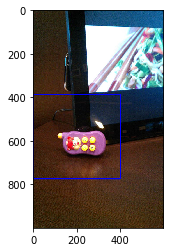

In [5]:
for img_path, score, bbs in similar_imgs:
    print(img_path)
    print(bbs)
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    show_img_with_bbs(img, bbs, 'ijhw_mat')

In [48]:
import torch

x = torch.zeros(5)
str(x)
x.device

device(type='cpu')

In [31]:
import numpy as np
regions_ijhw = np.array([[0, 0, 100, 100],
                        [2, 3, 100, 100],
                        [0, 0, 50, 50],
                        [5, 5, 30, 30]])
max_ijhw = np.amax(regions_ijhw, axis=0, keepdims=True)

In [32]:
max_ijhw

array([[  5,   5, 100, 100]])

In [45]:
mask = regions_ijhw < max_ijhw

In [46]:
mask

array([[ True,  True, False, False],
       [ True,  True, False, False],
       [ True,  True,  True,  True],
       [False, False,  True,  True]])

In [38]:
np.logical_and(mask[:, 2], mask[:, 3])

array([False, False,  True,  True])

In [41]:
mask[:, 2] * np.ones(4)

array([0., 0., 1., 1.])

In [44]:
regions_ijhw[:, [2, 3]]

array([[100, 100],
       [100, 100],
       [ 50,  50],
       [ 30,  30]])

In [47]:
mask.astype(np.float32)

array([[1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 1.],
       [0., 0., 1., 1.]], dtype=float32)